# Numerical EDA



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show all columns in output
pd.options.display.max_columns = None

# Show all values in columns
pd.options.display.max_colwidth = None

In [2]:
# get the dataset
df = pd.read_csv('./Datasets/house-votes-84.csv', na_values = '?')

In [3]:
# check the size of the dataset
print(df.shape)

# inspect the dataset
df.head()

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


It seems there are missing values un the dataset, lets remove all rows with missing values

In [4]:
# drop rows with missing values
df.dropna(axis = 0, inplace=True)

In [5]:
# re-check the size of the dataframe
df.shape

(232, 17)

In [6]:
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [7]:
# Next we rename the column names
column_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
                'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund',
                'crime', 'duty_free_exports', 'eaa_rsa']

df.columns = column_names

# check
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


since the values in the dataframe are y/n (yes or no) except for the `party` column, we'll get the dummies for these values.

In [8]:
# get dummy columns
dummy_cols = ['infants', 'water', 'budget', 'physician', 'salvador', 'religious',
             'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund',
             'crime', 'duty_free_exports', 'eaa_rsa']

# convert the values to dummies
party_data = pd.get_dummies(df, columns = dummy_cols, drop_first = True)

#check
party_data.head()

,party,infants_y,water_y,budget_y,physician_y,salvador_y,religious_y,satellite_y,aid_y,missile_y,immigration_y,synfuels_y,education_y,superfund_y,crime_y,duty_free_exports_y,eaa_rsa_y
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
18,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
22,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
24,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [9]:
# Lets rename the columns again
party_data.columns = column_names

# check
party_data.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
18,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
22,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
24,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [10]:
# numerical EDA
party_data.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.413793,0.461207,0.530172,0.487069,0.551724,0.642241,0.534483,0.512931,0.487069,0.551724,0.344828,0.465517,0.547414,0.642241,0.370690,0.814655
std,0.493577,0.499571,0.500168,0.500913,0.498393,0.480377,0.499888,0.500913,0.500913,0.498393,0.476340,0.499888,0.498823,0.480377,0.484034,0.389417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
party_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 4 to 430
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              232 non-null    object
 1   infants            232 non-null    uint8 
 2   water              232 non-null    uint8 
 3   budget             232 non-null    uint8 
 4   physician          232 non-null    uint8 
 5   salvador           232 non-null    uint8 
 6   religious          232 non-null    uint8 
 7   satellite          232 non-null    uint8 
 8   aid                232 non-null    uint8 
 9   missile            232 non-null    uint8 
 10  immigration        232 non-null    uint8 
 11  synfuels           232 non-null    uint8 
 12  education          232 non-null    uint8 
 13  superfund          232 non-null    uint8 
 14  crime              232 non-null    uint8 
 15  duty_free_exports  232 non-null    uint8 
 16  eaa_rsa            232 non-null    uint8 
dt

# Visual EDA

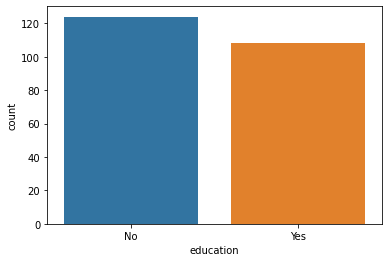

In [12]:
# import the seaborn library for plotting binary data
import seaborn as sns

# plot the education bill column
ax = sns.countplot(data = party_data, x = 'education')
plt.xticks([0,1], ['No', 'Yes'])

# show plot
plt.show()

The above chart shows the number of affirmative and rejected votes for the education bill


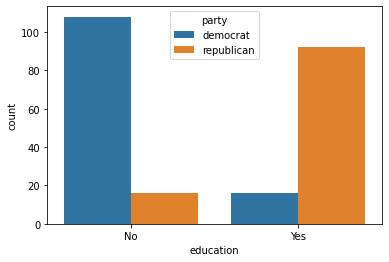

In [13]:
# plot the education bill column for each party
ax = sns.countplot(data = party_data, x = 'education', hue = 'party')
plt.xticks([0,1], ['No', 'Yes'])

# show plot
plt.show()

The above chart shows that democrats voted strongly against the education bill than republicans

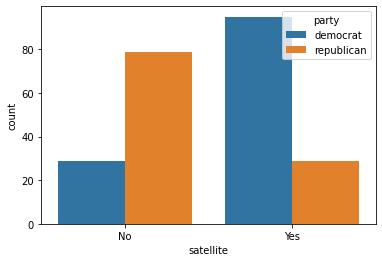

In [14]:
# show how each party voted the satelite bill
ax_2 = sns.countplot(x='satellite', hue='party', data=party_data)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Democrats voted for the satelite bill more than republicans

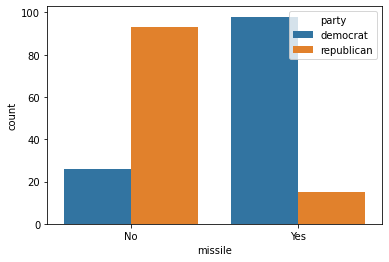

In [15]:
# show how each party voted the satelite bill
ax_2 = sns.countplot(x='missile', hue='party', data=party_data)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Republicans voted strongly against the satelite bill

# k-Nearest Neighbors: Fit


In [16]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = party_data['party'].values
x = party_data.drop('party', axis=1).values

# Instantiate a KNeighborsClassifier called knn with 6 neighbors
# by specifying the n_neighbors parameter.
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data using the .fit() method.
fit = knn.fit(x, y)

In [17]:
# get a random 1-dimensional array that serves as a new data point
rand = np.random.randint(2, size=(16)).reshape(1, -1)

# check
rand

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [18]:
# Predict and print the label for the new data point rand
new_prediction = knn.predict(rand)

# print
print(f"Prediction: {new_prediction}")

Prediction: ['republican']


# Measuring Model Performance

### The digits recognition dataset

In [19]:
# Import datasets from sklearn
from sklearn import datasets

# Load the digits dataset using the .load_digits() method on datasets
digits = datasets.load_digits()

# Print the keys and DESCR of digits.
print(digits.keys())
digits.DESCR

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [20]:
# Print the shape of images and data keys using the . notation.
print(digits.images.shape)
digits.data.shape

(1797, 8, 8)


(1797, 64)

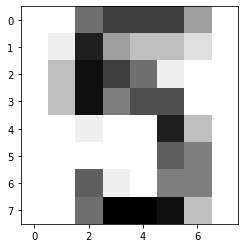

In [21]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Train/Test Split + Fit/Predict/Accuracy


In [22]:
from sklearn.model_selection import train_test_split

# Create an array for the features using digits.data and an array for the target using digits.target.
x_2 = digits.data
y_2 = digits.target

# Create stratified training and test sets using 0.2 for the size of the test set.
#Use a random state of 42. Stratify the split according to the labels so that they
#are distributed in the training and test sets as they are in the original dataset.
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size = 0.2, random_state = 42, stratify = y_2)

In [23]:
# check the test and train datasets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [24]:
# Create an instance of the k-NN classifier with 7 neighbors: knn
knn_2 = KNeighborsClassifier(n_neighbors = 7)

# fit the data to the knn instance
knn_2.fit(x_train, y_train)

# Compute and print the accuracy of the classifier's predictions using the .score() method.
knn_2.score(x_test, y_test)

0.9833333333333333

In [25]:
# generate a random test array
rand_2 = np.random.randint(16, size=(64)).reshape(1, -1)

# check
rand_2

array([[ 4, 10,  2, 11, 14,  5,  4,  5, 14,  0, 14, 13,  5,  2, 11, 11,
        11, 10,  6,  5, 13,  5, 13, 15, 10, 14,  2, 14,  3, 12,  3,  8,
         0,  9,  8, 11,  4,  4,  5,  7,  0, 12,  2, 12, 10,  1,  6, 10,
         1, 13, 13,  0,  9,  1,  6,  0,  6,  7,  6,  0,  3, 12,  1,  0]])

In [26]:
knn_2.predict(rand_2)

array([8])

# Overfitting and underfitting


You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

In [27]:
# Setup arrays to store train and test accuracies
# get the number of neighbors
neighbors = np.arange(1, 9)

# check
neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

In [28]:
# get a 1-D array of 8 elements
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# cehck
print(train_accuracy)
test_accuracy.shape

[0.14023372 0.14190317 0.33889816 0.34056761 0.53923205 0.5409015
 0.73956594 0.93989983]


(8,)

In [29]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN classifier with the number of neighbors equal to k.
    knn_3 = KNeighborsClassifier(n_neighbors = k)
    
    # Fit the classifier with k neighbors to the training data.
    knn_3.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_3.score(x_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn_3.score(x_test, y_test)

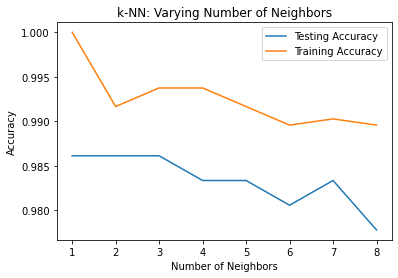

In [30]:
# Generate plot
# Set the title of plot
plt.title('k-NN: Varying Number of Neighbors')

# plot the number of neighbors with respect to the test accuracy
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')

# plot the number of neighbors with respect to the train accuracy
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')

# show the x axis label
plt.xlabel('Number of Neighbors')

# show the y-axis label
plt.ylabel('Accuracy')

# show plot labels
plt.legend()

#show the plot
plt.show()

Great work! It looks like the test accuracy is highest when using 3 and 7 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.